# Predicting Menstrual Days

## 3 Datenaufbereitung und -bereinigung:
### 3.1 Datenimport


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('FedCycleData071012(2).csv')
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


### 3.2 Datenüberblick

In [3]:
# Überblick der Spalten
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [4]:
# Alle Spaltennamen durchgehen und diejenigen auswählen, die mit 'M' enden
columns_with_M = [col for col in df.columns if col.endswith('M')]

# Ausgabe der ausgewählten Spalten
print("Spalten mit 'M' am Ende:")
print(columns_with_M)


Spalten mit 'M' am Ende:
['AgeM', 'MaristatusM', 'ReligionM', 'EthnicityM', 'SchoolyearsM', 'OccupationM', 'IncomeM', 'LivingkidsM', 'MedvitsM', 'MedvitexplainM', 'NextpregM', 'SpousesameM']


Hier sind alle 80 Spalten des Datensatzes zu sehen. Nun mache ich mir Gedanken darüber, welche dieser Spalten überhaupt relevant für dieses Projektes sind. 
Ich entscheide mich die Spalten, die demografische und persönliche Informationen enthalten und zugehörig dem männlichen Partner sind, aus meinem Datensatz zu entfernen. Für mich relevant sind besonders die körperlich bezogenen Informationen von weiblichen Personen. 

<span style="color:red">TO CHECK:</span>
- ClientID
- Group
- Method
- Boys / Girls?
- Ethnicity??? 

In [5]:
columns_to_drop = [
    'MaristatusM', 'Maristatus', 'Yearsmarried', 'Wedding', 'Religion', 'ReligionM',
    'Ethnicity', 'EthnicityM', 'Schoolyears', 'SchoolyearsM', 'OccupationM',
    'IncomeM', 'Spousesame', 'SpousesameM', 'AgeM', 'LivingkidsM', 'MedvitsM',
    'MedvitexplainM', 'NextpregM', 'Medvitexplain', 'Gynosurgeries', 'Urosurgeries', 'ClientID'
]

df = df.drop(columns=columns_to_drop)
num_columns_to_drop = len(columns_to_drop)
print("Number of columns to drop:", num_columns_to_drop)
print(df)
print(df.info())

Number of columns to drop: 23
      CycleNumber  Group  CycleWithPeakorNot  ReproductiveCategory  \
0               1      0                   1                     0   
1               2      0                   1                     0   
2               3      0                   1                     0   
3               4      0                   1                     0   
4               5      0                   1                     0   
...           ...    ...                 ...                   ...   
1660            7      1                   1                     0   
1661            8      1                   1                     0   
1662            9      1                   1                     0   
1663           10      1                   1                     1   
1664           11      1                   1                     2   

      LengthofCycle MeanCycleLength EstimatedDayofOvulation  \
0                29           27.33                      17   
1  

Die 19 Spalten wurden erfolgreich aus dem Datensatz entfernt.

### 3.3 Datentypen anpassen

Von den nun 61 übrig gebliebenen Spalten, schaue ich mir die Datentypen genauer an. 
Obwohl in den meisten Spalten numerische Werte drin sind, sind die meisten als 'Object' deklariert. 
Diese sollten eher in numerische Datentypen umgewandelt werden. 

In [6]:
# Nur Objext-Type-Spalten anzeigen
object_columns = df.select_dtypes(include=['object']).columns

print("Object-Typ-Spalten:")
print(object_columns)

Object-Typ-Spalten:
Index(['MeanCycleLength', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'FirstDayofHigh', 'TotalNumberofHighDays', 'TotalHighPostPeak',
       'TotalNumberofPeakDays', 'TotalDaysofFertility',
       'TotalFertilityFormula', 'LengthofMenses', 'MeanMensesLength',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'MensesScoreDaySix',
       'MensesScoreDaySeven', 'MensesScoreDayEight', 'MensesScoreDayNine',
       'MensesScoreDayTen', 'MensesScoreDay11', 'MensesScoreDay12',
       'MensesScoreDay13', 'MensesScoreDay14', 'MensesScoreDay15',
       'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'Height', 'Weight', 'Reprocate', 'Numberpreg', 'Livingkids',
       'Miscarriages', 'Abortions', 'Medvits', 'Boys', 'Girls',
       'Breastfeeding'

In [7]:
# Object-Typ-Spalten finden
object_columns = df.select_dtypes(include=['object']).columns

# Object-Typ-Spalten anzeigen und einzigartige Werte prüfen
for column in object_columns:
    unique_values = df[column].unique()
    print(f"\nSpalte '{column}':")
    print(unique_values)


Spalte 'MeanCycleLength':
['27.33' ' ' '31' '26.33' '26.88' '25.33' '28.75' '25.88' '27.67' '26.75'
 '27.17' '32.83' '33.5' '32.6' '29' '30.36' '31.33' '27.58' '29.9' '25.15'
 '27' '32' '29.4' '27.43' '28.77' '27.62' '30.64' '29.67' '25.8' '25.23'
 '29.5' '34.07' '30.92' '30.25' '28.46' '28.15' '40' '33.92' '27.46'
 '26.69' '26.38' '26.42' '27.08' '30.75' '31.75' '28.23' '33.38' '30.15'
 '26.25' '33.46' '26.77' '38.81' '31.4' '27.36' '25.7' '31.55' '37.17'
 '30.83' '31.17' '27.15' '27.4' '35.95' '31.26' '27.78' '30.93' '25.4'
 '26.71' '29.82' '27.5' '26.85' '30.94' '33.83' '26.5' '25.5' '26.27'
 '28.17' '27.29' '27.75' '30.5' '30' '31.14' '29.1' '24' '26.78' '39'
 '36.33' '25.85' '31.6' '29.62' '37' '29.38' '32.25' '34.5' '31.45'
 '33.47' '27.92' '27.9' '26' '26.58' '30.42' '32.07' '33' '26.94' '28.54'
 '29.63']

Spalte 'EstimatedDayofOvulation':
['17' '15' '16' '14' '18' '12' '19' ' ' '11' '13' '27' '22' '8' '20' '21'
 '23' '10' '26' '24' '29' '9' '25' '28' '6']

Spalte 'LengthofLute

In [8]:
# Spalten die eigentlich numerisch sind deklarieren: 
columns_to_convert = ['MeanCycleLength', 'EstimatedDayofOvulation',
       'LengthofLutealPhase', 'FirstDayofHigh', 'TotalNumberofHighDays',
       'TotalHighPostPeak', 'TotalNumberofPeakDays', 'TotalDaysofFertility',
       'TotalFertilityFormula', 'LengthofMenses', 'MeanMensesLength',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'MensesScoreDaySix',
       'MensesScoreDaySeven', 'MensesScoreDayEight', 'MensesScoreDayNine',
       'MensesScoreDayTen', 'MensesScoreDay11', 'MensesScoreDay12',
       'MensesScoreDay13', 'MensesScoreDay14', 'MensesScoreDay15',
       'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'Height', 'Weight', 'Reprocate', 'Numberpreg',
       'Livingkids', 'Miscarriages', 'Abortions', 'Medvits', 'Boys', 'Girls',
       'Breastfeeding', 'Method',
       'Prevmethod', 'Methoddate', 'Whychart', 'Nextpreg',
       'Timeattemptpreg', 'BMI']

# Loop über die Spalten und Umwandlung der Werte in float
for col in columns_to_convert:
    # Entfernen von Leerzeichen oder anderen nicht numerischen Zeichen (falls vorhanden)
    df[col] = df[col].replace(' ', '', regex=True)
    # Umwandlung in float
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Überprüfung der Datentypen nach der Umwandlung
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CycleNumber                 1665 non-null   int64  
 1   Group                       1665 non-null   int64  
 2   CycleWithPeakorNot          1665 non-null   int64  
 3   ReproductiveCategory        1665 non-null   int64  
 4   LengthofCycle               1665 non-null   int64  
 5   MeanCycleLength             141 non-null    float64
 6   EstimatedDayofOvulation     1515 non-null   float64
 7   LengthofLutealPhase         1514 non-null   float64
 8   FirstDayofHigh              1407 non-null   float64
 9   TotalNumberofHighDays       1653 non-null   float64
 10  TotalHighPostPeak           1662 non-null   float64
 11  TotalNumberofPeakDays       1649 non-null   float64
 12  TotalDaysofFertility        1634 non-null   float64
 13  TotalFertilityFormula       1663 

Nun sind alle numerischen Werte die vorher den Datentyp Object hatten, als float-Datentyp deklariert.

Damit die Datentypen konsistent sind, wandle ich auch noch die Integer in float-Datentypen um. So können unerwartete Verhaltensweisen minimiert werden. 

In [9]:
integer_columns = df.select_dtypes(include=['int']).columns
df[integer_columns] = df[integer_columns].astype(float)

print(df.dtypes)

CycleNumber                   float64
Group                         float64
CycleWithPeakorNot            float64
ReproductiveCategory          float64
LengthofCycle                 float64
MeanCycleLength               float64
EstimatedDayofOvulation       float64
LengthofLutealPhase           float64
FirstDayofHigh                float64
TotalNumberofHighDays         float64
TotalHighPostPeak             float64
TotalNumberofPeakDays         float64
TotalDaysofFertility          float64
TotalFertilityFormula         float64
LengthofMenses                float64
MeanMensesLength              float64
MensesScoreDayOne             float64
MensesScoreDayTwo             float64
MensesScoreDayThree           float64
MensesScoreDayFour            float64
MensesScoreDayFive            float64
MensesScoreDaySix             float64
MensesScoreDaySeven           float64
MensesScoreDayEight           float64
MensesScoreDayNine            float64
MensesScoreDayTen             float64
MensesScoreD

In [10]:
print(df)

      CycleNumber  Group  CycleWithPeakorNot  ReproductiveCategory  \
0             1.0    0.0                 1.0                   0.0   
1             2.0    0.0                 1.0                   0.0   
2             3.0    0.0                 1.0                   0.0   
3             4.0    0.0                 1.0                   0.0   
4             5.0    0.0                 1.0                   0.0   
...           ...    ...                 ...                   ...   
1660          7.0    1.0                 1.0                   0.0   
1661          8.0    1.0                 1.0                   0.0   
1662          9.0    1.0                 1.0                   0.0   
1663         10.0    1.0                 1.0                   1.0   
1664         11.0    1.0                 1.0                   2.0   

      LengthofCycle  MeanCycleLength  EstimatedDayofOvulation  \
0              29.0            27.33                     17.0   
1              27.0          

In [11]:
# Statistische Zusammenfassung von den numerischen Spalten
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CycleNumber,1665.0,8.040841,6.593686,1.000000,3.000000,7.000000,11.000000,45.00000
Group,1665.0,0.382583,0.486164,0.000000,0.000000,0.000000,1.000000,1.00000
CycleWithPeakorNot,1665.0,0.912312,0.282925,0.000000,1.000000,1.000000,1.000000,1.00000
ReproductiveCategory,1665.0,0.055255,0.479706,0.000000,0.000000,0.000000,0.000000,9.00000
LengthofCycle,1665.0,29.299099,3.887932,18.000000,27.000000,29.000000,31.000000,54.00000
MeanCycleLength,141.0,29.554255,3.048391,24.000000,27.000000,29.500000,31.170000,40.00000
EstimatedDayofOvulation,1515.0,15.963036,3.548488,6.000000,14.000000,15.000000,18.000000,29.00000
LengthofLutealPhase,1514.0,13.270806,2.671602,1.000000,12.000000,13.000000,14.000000,41.00000
FirstDayofHigh,1407.0,11.761905,3.253758,5.000000,10.000000,11.000000,13.000000,26.00000
TotalNumberofHighDays,1653.0,4.248034,3.502879,0.000000,2.000000,3.000000,5.000000,22.00000


### 3.4 Behandlung von fehlenden Werten

In [12]:
# Anzahl der fehlenden Werte pro Spalte
df.isnull().sum()

CycleNumber                      0
Group                            0
CycleWithPeakorNot               0
ReproductiveCategory             0
LengthofCycle                    0
MeanCycleLength               1524
EstimatedDayofOvulation        150
LengthofLutealPhase            151
FirstDayofHigh                 258
TotalNumberofHighDays           12
TotalHighPostPeak                3
TotalNumberofPeakDays           16
TotalDaysofFertility            31
TotalFertilityFormula            2
LengthofMenses                   4
MeanMensesLength              1524
MensesScoreDayOne                4
MensesScoreDayTwo                4
MensesScoreDayThree             25
MensesScoreDayFour              87
MensesScoreDayFive             434
MensesScoreDaySix             1062
MensesScoreDaySeven           1441
MensesScoreDayEight           1597
MensesScoreDayNine            1639
MensesScoreDayTen             1659
MensesScoreDay11              1663
MensesScoreDay12              1664
MensesScoreDay13    

In [13]:
# Anzahl der fehlenden Werte pro Spalte zählen
missing_counts = df.isnull().sum()

# Filtern, um nur die Spalten zu erhalten, die mindestens einen fehlenden Wert haben
columns_with_missing_values = missing_counts[missing_counts > 0].index.tolist()

# Anzahl der betroffenen Spalten ausgeben
print(f"Anzahl der Spalten mit fehlenden Werten: {len(columns_with_missing_values)}")
print("Betroffene Spalten:")
print(columns_with_missing_values)

Anzahl der Spalten mit fehlenden Werten: 52
Betroffene Spalten:
['MeanCycleLength', 'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh', 'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays', 'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses', 'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive', 'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight', 'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11', 'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14', 'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity', 'NumberofDaysofIntercourse', 'IntercourseInFertileWindow', 'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed', 'Age', 'Height', 'Weight', 'Reprocate', 'Numberpreg', 'Livingkids', 'Miscarriages', 'Abortions', 'Medvits', 'Boys', 'Girls', 'Breastfeeding', 'Method', 'Prevmethod', 'Methoddate', 'Whychart', 'Nextpre

TO CHECK:
- entfernen von Zeilen / Spalten?
- Auffüllen der fehlenden Werten?

### 3.4 Duplikate finden und ggf. entfernen

In [14]:
# Duplikate anzeigen
duplicates = df[df.duplicated()]
print("Duplikate anzeigen:")
print(duplicates)


Duplikate anzeigen:
     CycleNumber  Group  CycleWithPeakorNot  ReproductiveCategory  \
497          1.0    0.0                 1.0                   0.0   
499          3.0    0.0                 1.0                   0.0   
502          3.0    0.0                 1.0                   0.0   
503          4.0    0.0                 1.0                   0.0   
504          5.0    0.0                 0.0                   0.0   
505          6.0    0.0                 0.0                   0.0   
506          7.0    0.0                 1.0                   0.0   
507          8.0    0.0                 0.0                   0.0   
508          1.0    0.0                 1.0                   0.0   
509          2.0    0.0                 1.0                   0.0   
510          3.0    0.0                 1.0                   0.0   
527          1.0    0.0                 1.0                   0.0   

     LengthofCycle  MeanCycleLength  EstimatedDayofOvulation  \
497           25.0

### fehlende Werte

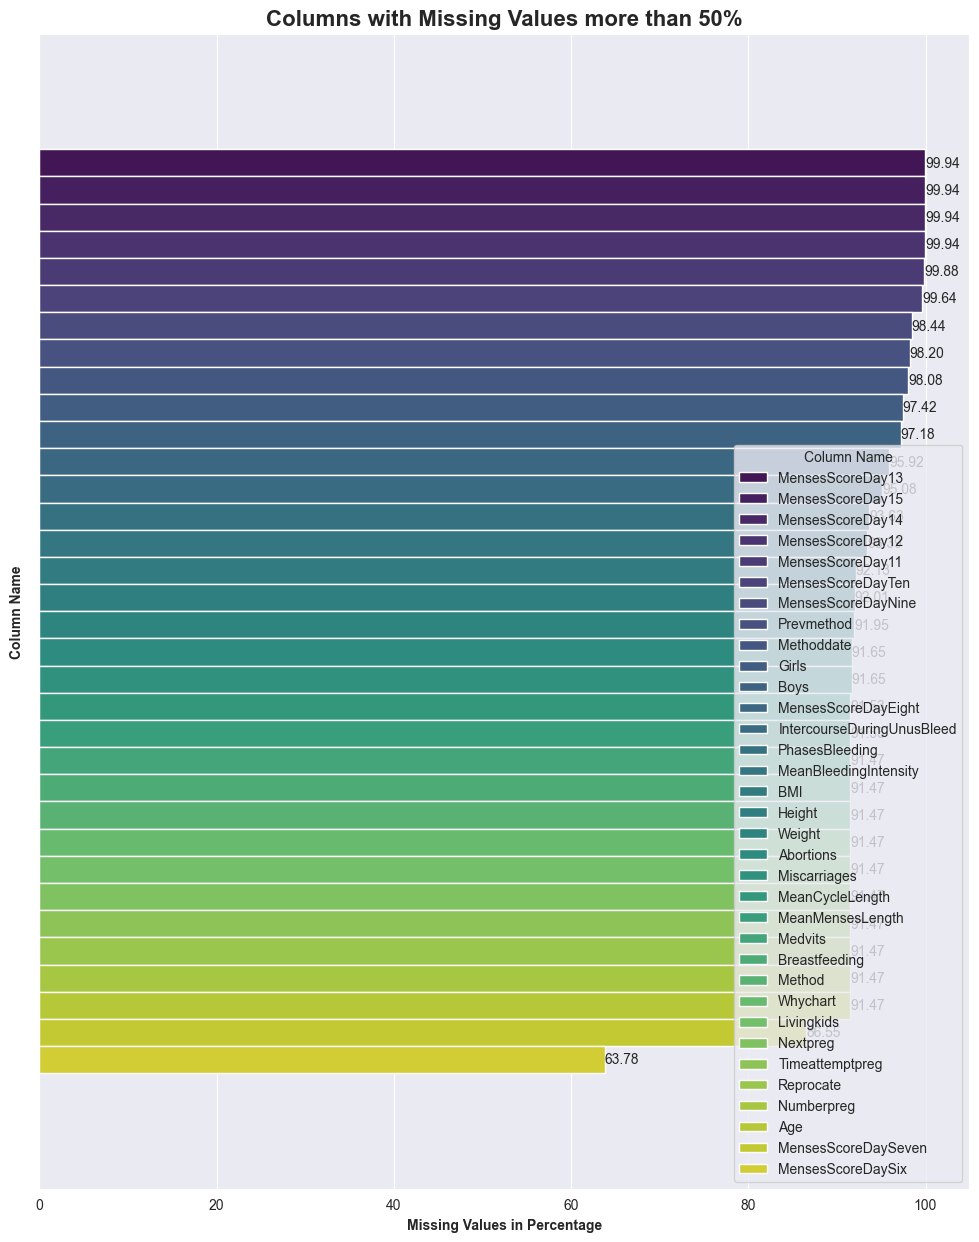

In [15]:
null = df.isnull().sum().sort_values(ascending=False)
null_per = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False)*100.
null_values = pd.DataFrame({
    "Column Name": null.index,
    "Total Number of Missing Values": null.values,
    "Missing Values in Percentage": null_per.values
})

sns.set_style('darkgrid')
plt.figure(figsize=(12, 15))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", hue="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values more than 50%',fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage',fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

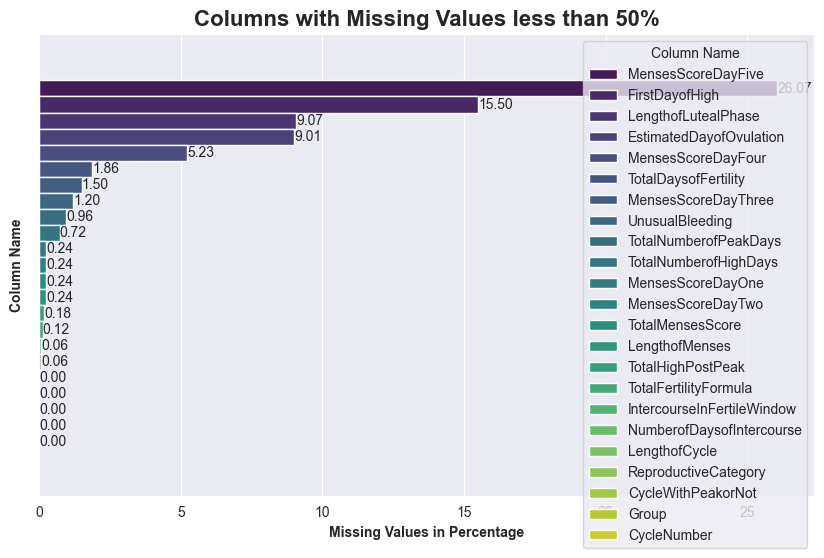

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", hue="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values less than 50%', fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage', fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

In [17]:
remove_cols = null_values[null_values["Missing Values in Percentage"] >= 50]["Column Name"].tolist()
df = df.drop(columns=remove_cols)

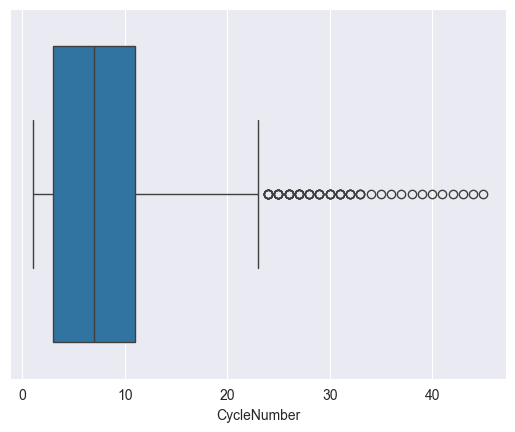

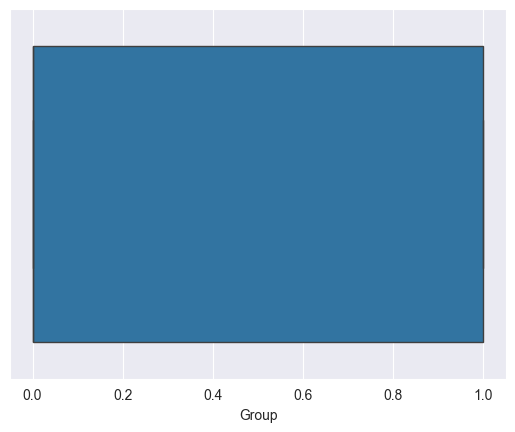

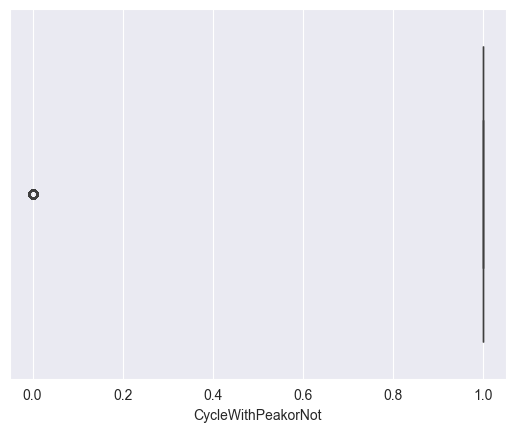

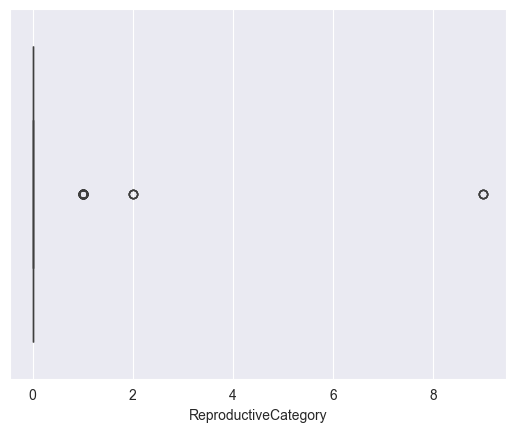

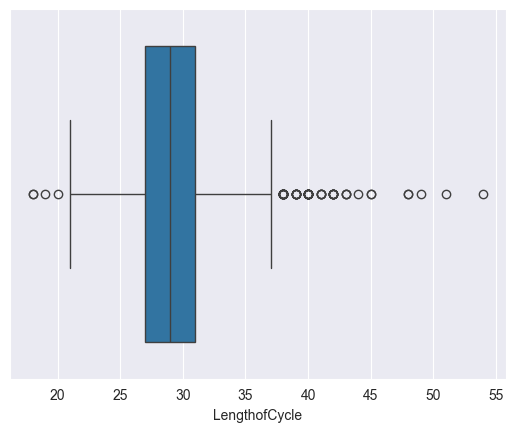

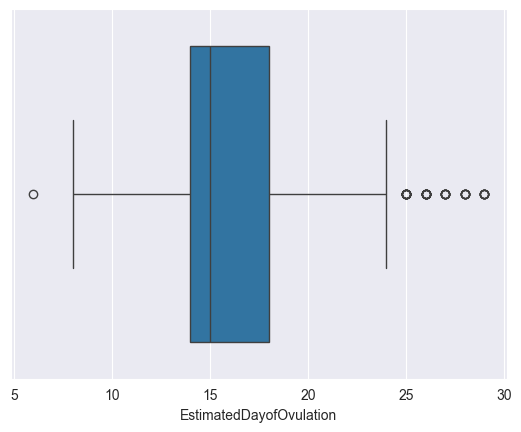

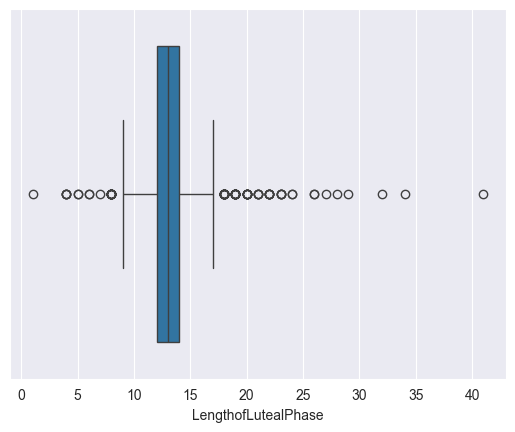

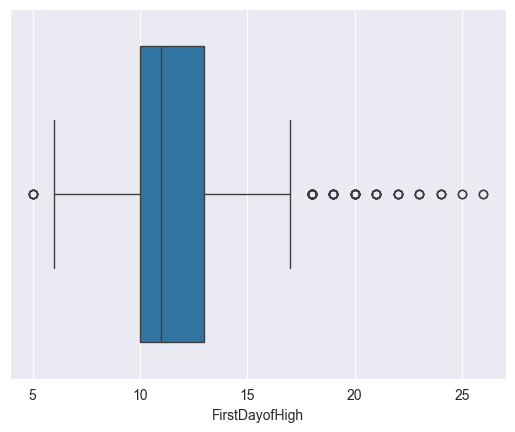

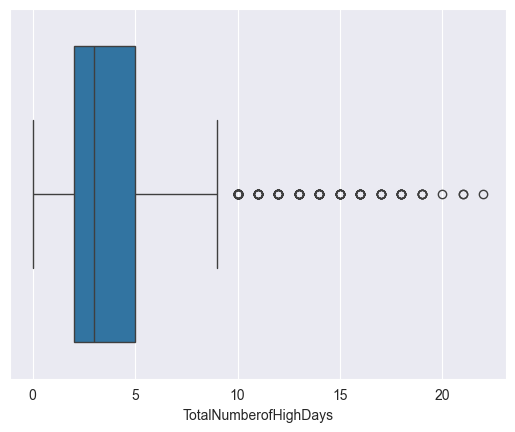

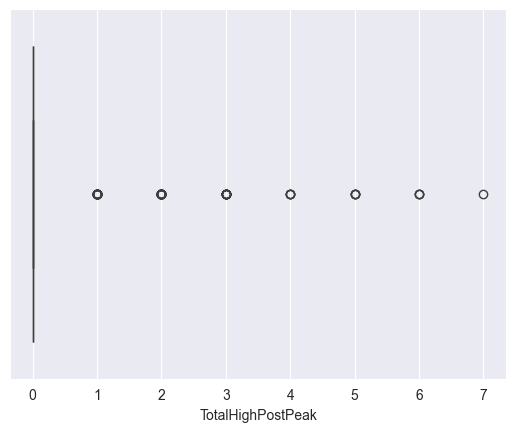

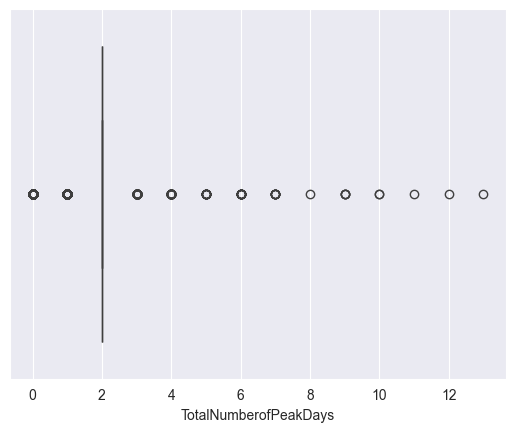

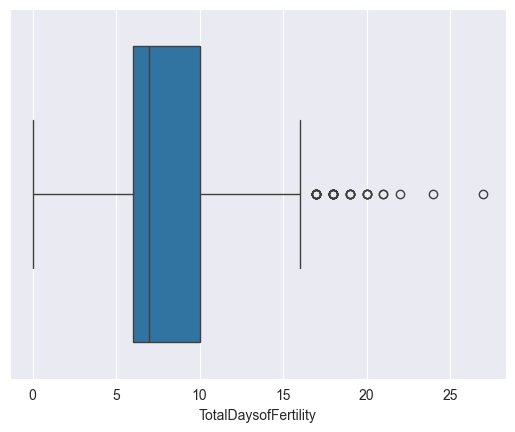

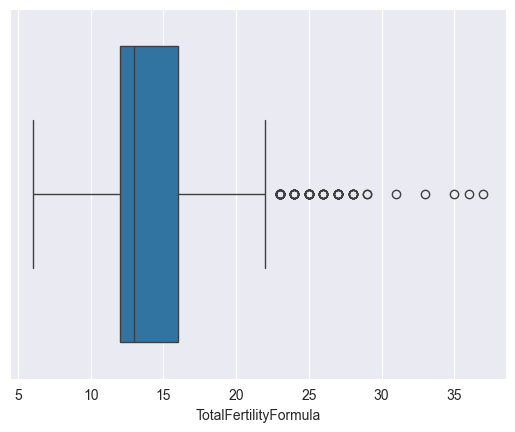

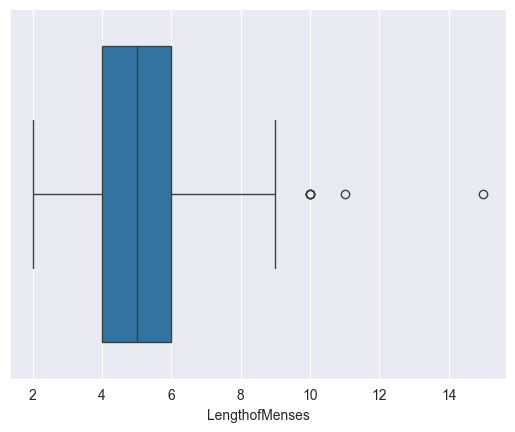

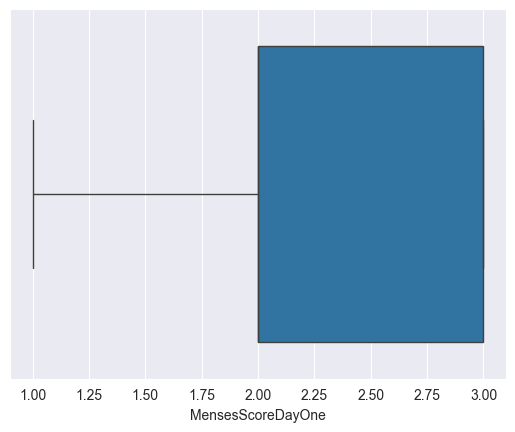

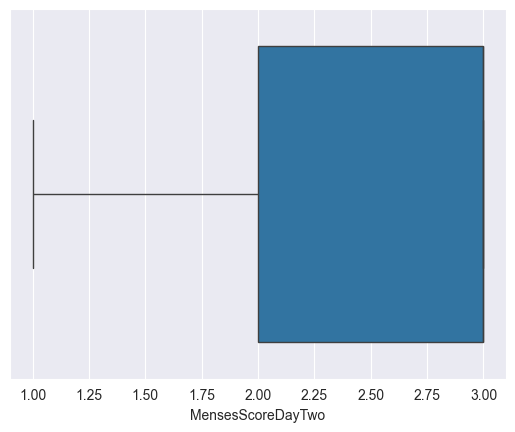

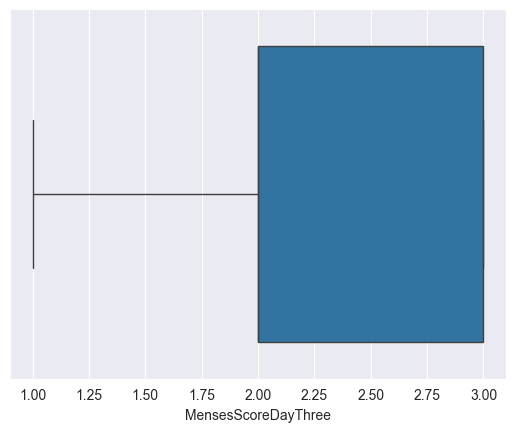

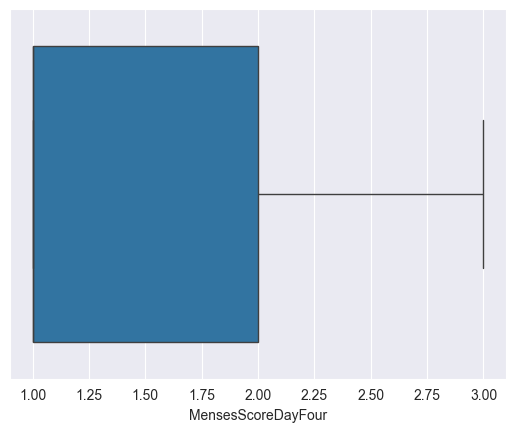

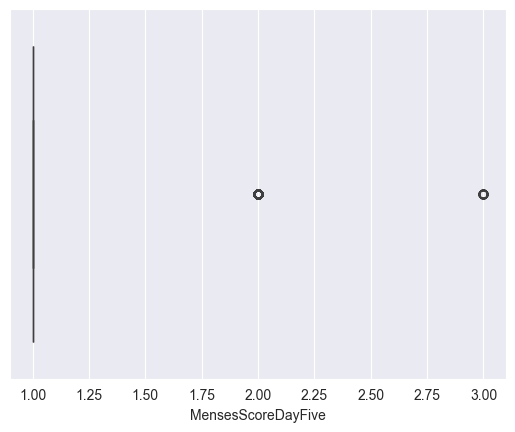

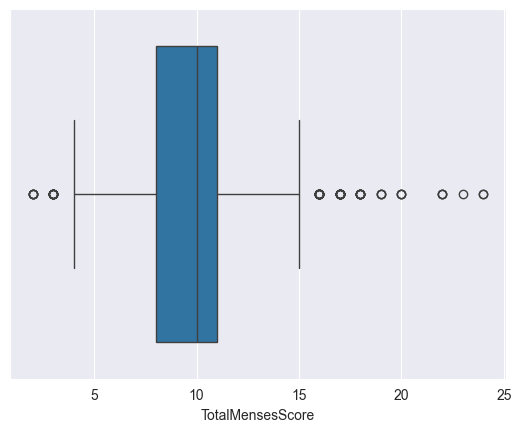

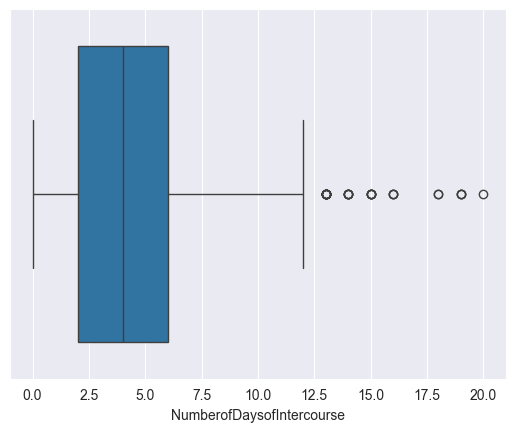

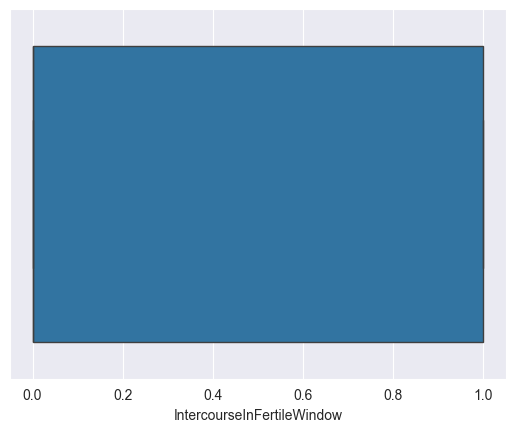

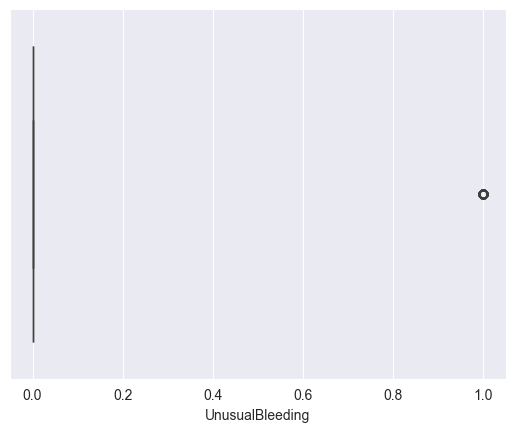

In [18]:
for cols in df.columns:    
    sns.boxplot(data=df[cols] ,orient= "h")
    plt.show()
    

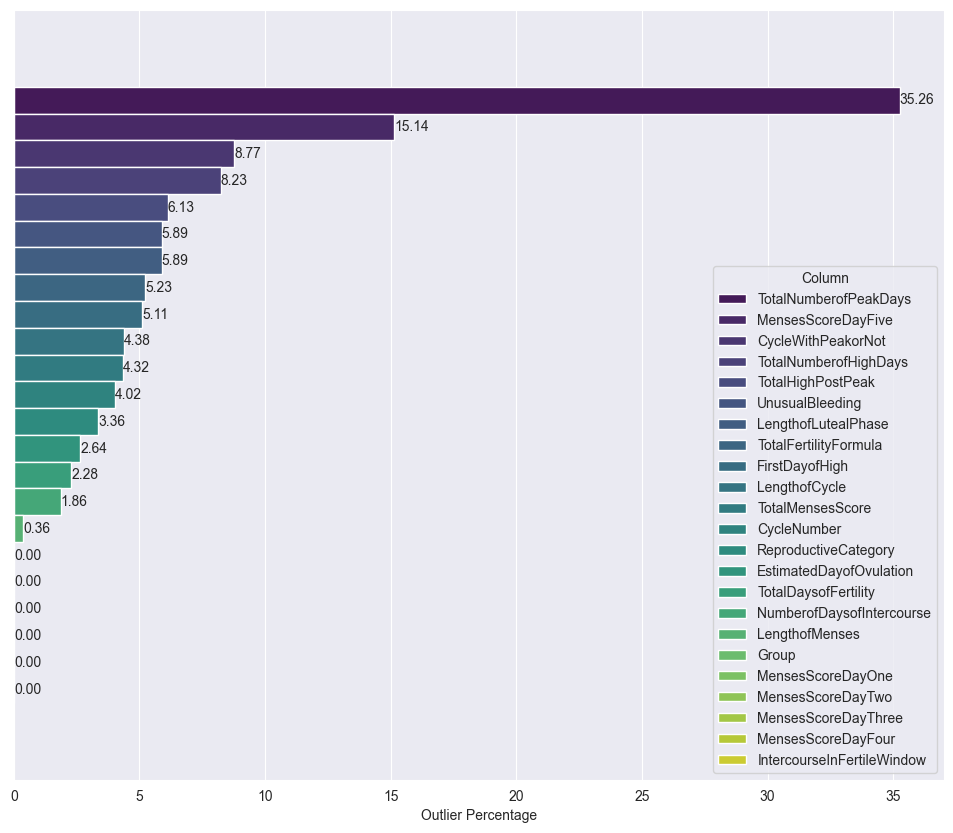

In [19]:
outliers_percentages = []

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_percentage = (outliers_count / len(df[col])) * 100
    
    outliers_percentages.append({'Column': col, 'Outlier Percentage': outliers_percentage})

outliers_df = pd.DataFrame(outliers_percentages)
outliers_df = outliers_df.sort_values(by='Outlier Percentage', ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
ax = sns.barplot(data=outliers_df, x="Outlier Percentage", hue="Column", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.show()

In [20]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Calculate outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_percentage = outliers.mean() * 100
    
    
    df[col] = df[col].where(~outliers, np.mean(df[col]))

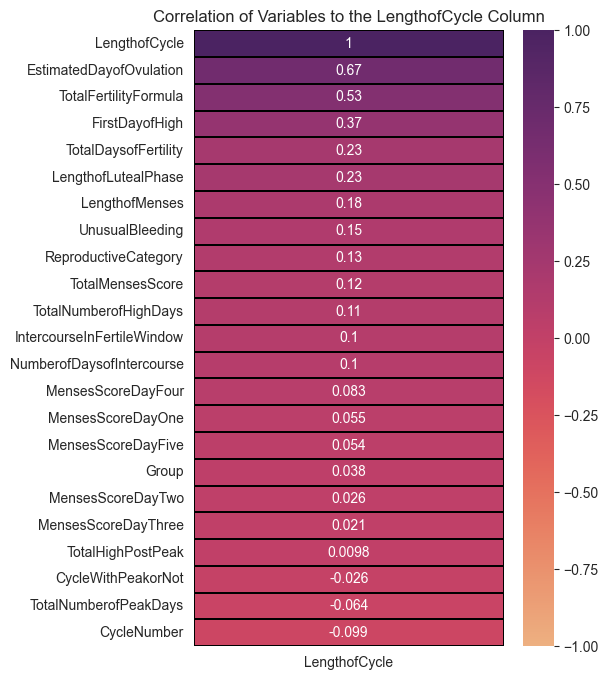

In [21]:
plt.figure(figsize=(5,8))
sns.heatmap(df.corr()['LengthofCycle'].sort_values(ascending=False).to_frame(),
            annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black', cmap= 'flare')
plt.title('Correlation of Variables to the LengthofCycle Column')
plt.show()

# Ab hier der Beginn der 2. Iteration von Sprint 3

## Welche Features möchte ich behalten? 2.0
Dieses Mal möchte ich mich auf mehrer Features beschränken, um lieber mehr Features zu haben, die für User später eher verständlich sind. Dafür aber welche die zwar mehr Korrelation haben wegzulassen. 

### Features die genommen werden, da für User einzutragen
- Estimated Day of Ovulation
    - Der geschätzte Tag, an dem der Eisprung stattfindet, basierend auf dem Zyklus oder den Symptomen.
- Lengt of Luteal Phase
    - Die Länge der Lutealphase des Menstruationszyklus, die Zeit nach dem Eisprung bis zum Beginn der nächsten Menstruation.
- Length of Menses
    - Die Anzahl der Tage, die die Menstruation dauert.
- Menses Score Day 1-5
    - Bewertungen oder Scores für die Menstruation an den einzelnen Tagen der Menstruationsperiode (von Tag 1 bis Tag 5).
- Total Menses Score
    - Eine zusammenfassende Bewertung der Menstruationsperiode basierend auf den Scores der einzelnen Tage.
- Number of Days of Intercourse
    - Die Anzahl der Tage, an denen Geschlechtsverkehr stattgefunden hat.
- Unusual Bleeding
    - Ob ungewöhnliche Blutungen außerhalb der normalen Menstruationsperiode festgestellt wurden.

In [22]:
# alle übrig gebliebenen Spalten ausgeben lassen
remaining_columns_list = df.columns.tolist()  # Spaltenüberschriften als Liste
print("Verbleibende Spalten als Liste:", remaining_columns_list)

Verbleibende Spalten als Liste: ['CycleNumber', 'Group', 'CycleWithPeakorNot', 'ReproductiveCategory', 'LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh', 'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays', 'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses', 'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse', 'IntercourseInFertileWindow', 'UnusualBleeding']


In [23]:
# Liste der zu behaltenden Spalten
columns_to_keep = [
    'EstimatedDayofOvulation',
    'LengthofLutealPhase',
    'LengthofMenses',
    'MensesScoreDayOne',
    'MensesScoreDayTwo',
    'MensesScoreDayThree',
    'MensesScoreDayFour',
    'MensesScoreDayFive',
    'TotalMensesScore',
    'NumberofDaysofIntercourse',
    'UnusualBleeding'
]

# Erstellen einer neuen Liste der Spalten, die gelöscht werden sollen
columns_to_delete = [col for col in df.columns if col not in columns_to_keep and col != 'LengthofCycle']

# Löschen der unerwünschten Spalten
df_cleaned = df.drop(columns=columns_to_delete)

# Ausgabe der verbleibenden Spalten
print("Verbleibende Spalten nach dem Löschen:", df_cleaned.columns.tolist())


Verbleibende Spalten nach dem Löschen: ['LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses', 'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse', 'UnusualBleeding']


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Extrahiere die Zielvariable
y = df["LengthofCycle"]

# Wähle nur die verbleibenden Spalten für x (die Features)
x = df[['EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses', 'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse', 'UnusualBleeding']]

# Skalierung der Merkmale
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Aufteilung in Trainings- und Testmengen
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Optional: Überprüfe die Größen der resultierenden Datensätze
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (1332, 11)
x_test shape: (333, 11)
y_train shape: (1332,)
y_test shape: (333,)


# Random Forest verschiedenste Versuche

In [25]:
# Random Forest so wie vorher mit den n_estimator von 49
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

random_forest = RandomForestRegressor(n_estimators= 49, criterion="squared_error", max_depth= 67)
random_forest.fit(x_train, y_train)




RandomForestRegressor(max_depth=67, n_estimators=49)

In [26]:
y_pred = random_forest.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.6331992922486183


vorherige rmse mit nur 2 Features aber eher Korrealtion, war deutlisch höher
lag bei 2.1797878552850007

In [40]:
# Vorhersage
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Zielvariable und Features extrahieren
y = df["LengthofCycle"]
x = df[['EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses', 'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse', 'UnusualBleeding']]

# Skalierung der Features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Aufteilung in Trainings- und Testmengen
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Erstellen und Trainieren des Random Forest Regressors
random_forest = RandomForestRegressor(n_estimators=49, criterion="squared_error", max_depth=67)
random_forest.fit(x_train, y_train)

# Vorhersage auf den Testdaten und Berechnung des RMSE
y_pred = random_forest.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Beispielvorhersage
# Angenommene neue Daten
new_data = pd.DataFrame({
    'EstimatedDayofOvulation': [15],  # Beispielwert für den geschätzten Tag des Eisprungs
    'LengthofLutealPhase': [13],       # Beispielwert für die Länge der Lutealphase in Tagen
    'LengthofMenses': [4],              # Beispielwert für die Dauer der Menstruation in Tagen
    'MensesScoreDayOne': [2],           # Beispielwert für die Bewertung am ersten Menstruationstag
    'MensesScoreDayTwo': [3],           # Beispielwert für die Bewertung am zweiten Menstruationstag
    'MensesScoreDayThree': [3],         # Beispielwert für die Bewertung am dritten Menstruationstag
    'MensesScoreDayFour': [2],          # Beispielwert für die Bewertung am vierten Menstruationstag
    'MensesScoreDayFive': [0],          # Beispielwert für die Bewertung am fünften Menstruationstag
    'TotalMensesScore': [10],           # Beispielwert für die Gesamtnote der Menstruation
    'NumberofDaysofIntercourse': [4],   # Beispielwert für die Anzahl der Tage mit Geschlechtsverkehr
    'UnusualBleeding': [0]              # Beispielwert für ungewöhnliche Blutungen (0 = nein, 1 = ja)
})


# Skalieren der neuen Daten
new_data_scaled = scaler.transform(new_data)

# Vorhersage für die neuen Daten
example_prediction = random_forest.predict(new_data_scaled)
print("Beispielvorhersage:", example_prediction[0])


RMSE: 1.6350139602657356
Beispielvorhersage: 28.0


## Hyperparameter Tuning

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Definiere die Hyperparameter-Raster
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Ersetze 'auto' durch 'sqrt' oder 'log2'
    'bootstrap': [True, False]
}

# Erstelle das Random Forest Modell
rf = RandomForestRegressor()

# Erstelle GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=1, error_score='raise')

# Trainiere GridSearchCV
grid_search.fit(x_train, y_train)

# Beste Hyperparameter und Bewertung anzeigen
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_rmse = np.sqrt(-grid_search.best_score_)
print(f"Best RMSE from CV: {best_rmse}")

# Vorhersage mit dem besten Modell
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(x_test)
best_rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
print(f"RMSE des besten Random Forest Modells auf den Testdaten: {best_rf_rmse}")

# Beispielvorhersage mit dem besten Modell
new_data = pd.DataFrame({
    'EstimatedDayofOvulation': [15],  # Beispielwert für den geschätzten Tag des Eisprungs
    'LengthofLutealPhase': [13],       # Beispielwert für die Länge der Lutealphase in Tagen
    'LengthofMenses': [4],              # Beispielwert für die Dauer der Menstruation in Tagen
    'MensesScoreDayOne': [2],           # Beispielwert für die Bewertung am ersten Menstruationstag
    'MensesScoreDayTwo': [3],           # Beispielwert für die Bewertung am zweiten Menstruationstag
    'MensesScoreDayThree': [3],         # Beispielwert für die Bewertung am dritten Menstruationstag
    'MensesScoreDayFour': [2],          # Beispielwert für die Bewertung am vierten Menstruationstag
    'MensesScoreDayFive': [0],          # Beispielwert für die Bewertung am fünften Menstruationstag
    'TotalMensesScore': [10],           # Beispielwert für die Gesamtnote der Menstruation
    'NumberofDaysofIntercourse': [4],   # Beispielwert für die Anzahl der Tage mit Geschlechtsverkehr
    'UnusualBleeding': [0]              # Beispielwert für ungewöhnliche Blutungen (0 = nein, 1 = ja)
})


# Vorhersage für die neuen Daten
example_prediction = best_rf_model.predict(new_data)
print("Beispielvorhersage:", example_prediction[0])


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best RMSE from CV: 1.7093076143185757
RMSE des besten Random Forest Modells auf den Testdaten: 1.8475379011631308
Beispielvorhersage: 32.52626526526528


/Users/bettinajustus/data_science/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Erstellen und Trainieren des Random Forest Regressors
random_forest = RandomForestRegressor(n_estimators=49, criterion="squared_error", max_depth=67)
random_forest.fit(x_train, y_train)

# Vorhersage auf den Testdaten und Berechnung des RMSE
y_pred = random_forest.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Beispielvorhersage
# Angenommene neue Daten
new_data = pd.DataFrame({
    'EstimatedDayofOvulation': [15],  # Beispielwert für den geschätzten Tag des Eisprungs
    'LengthofLutealPhase': [13],       # Beispielwert für die Länge der Lutealphase in Tagen
    'LengthofMenses': [4],              # Beispielwert für die Dauer der Menstruation in Tagen
    'MensesScoreDayOne': [2],           # Beispielwert für die Bewertung am ersten Menstruationstag
    'MensesScoreDayTwo': [3],           # Beispielwert für die Bewertung am zweiten Menstruationstag
    'MensesScoreDayThree': [3],         # Beispielwert für die Bewertung am dritten Menstruationstag
    'MensesScoreDayFour': [2],          # Beispielwert für die Bewertung am vierten Menstruationstag
    'MensesScoreDayFive': [0],          # Beispielwert für die Bewertung am fünften Menstruationstag
    'TotalMensesScore': [10],           # Beispielwert für die Gesamtnote der Menstruation
    'NumberofDaysofIntercourse': [4],   # Beispielwert für die Anzahl der Tage mit Geschlechtsverkehr
    'UnusualBleeding': [0]              # Beispielwert für ungewöhnliche Blutungen (0 = nein, 1 = ja)
})

# Skalieren der neuen Daten
new_data_scaled = scaler.transform(new_data)

# Vorhersage für die neuen Daten
example_prediction = random_forest.predict(new_data_scaled)
print("Beispielvorhersage:", example_prediction[0])


RMSE: 1.6730933961404606
Beispielvorhersage: 28.0


# XGB Regressor

In [34]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [35]:
import xgboost as xgb

simple_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=123)
simple_reg.fit(x_train,y_train)

y_pred = simple_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.7786670119939103


auch hier rmse sehr viel geringer, vorher: 2.1797878552850007

In [36]:
# Zielvariable und Features extrahieren
y = df["LengthofCycle"]
x = df[['EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses', 'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse', 'UnusualBleeding']]

# Skalierung der Features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Aufteilung in Trainings- und Testmengen
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Erstellen und Trainieren des XGBoost Regressors
simple_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=123)
simple_reg.fit(x_train, y_train)

# Vorhersage auf den Testdaten und Berechnung des RMSE
y_pred = simple_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Beispielvorhersage
# Angenommene neue Daten
new_data = pd.DataFrame({
    'EstimatedDayofOvulation': [15],  # Beispielwert für den geschätzten Tag des Eisprungs
    'LengthofLutealPhase': [13],       # Beispielwert für die Länge der Lutealphase in Tagen
    'LengthofMenses': [4],              # Beispielwert für die Dauer der Menstruation in Tagen
    'MensesScoreDayOne': [2],           # Beispielwert für die Bewertung am ersten Menstruationstag
    'MensesScoreDayTwo': [3],           # Beispielwert für die Bewertung am zweiten Menstruationstag
    'MensesScoreDayThree': [3],         # Beispielwert für die Bewertung am dritten Menstruationstag
    'MensesScoreDayFour': [2],          # Beispielwert für die Bewertung am vierten Menstruationstag
    'MensesScoreDayFive': [0],          # Beispielwert für die Bewertung am fünften Menstruationstag
    'TotalMensesScore': [10],           # Beispielwert für die Gesamtnote der Menstruation
    'NumberofDaysofIntercourse': [4],   # Beispielwert für die Anzahl der Tage mit Geschlechtsverkehr
    'UnusualBleeding': [0]              # Beispielwert für ungewöhnliche Blutungen (0 = nein, 1 = ja)
})

# Skalieren der neuen Daten
new_data_scaled = scaler.transform(new_data)

# Vorhersage für die neuen Daten
example_prediction = simple_reg.predict(new_data_scaled)
print("Beispielvorhersage:", example_prediction[0])


RMSE: 1.7786670119939103
Beispielvorhersage: 28.066196


## Hyperparameter Tuning

In [38]:
# Zielvariable und Features extrahieren
y = df["LengthofCycle"]
x = df[['EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses', 'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore', 'NumberofDaysofIntercourse', 'UnusualBleeding']]

# Skalierung der Features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Aufteilung in Trainings- und Testmengen
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Definition der Hyperparameter-Raster
param = {
    "eta": [0.1, 0.2, 0.3],
    "max_depth": [10, 50, 100],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Erstellen und Trainieren von GridSearchCV
xg_reg = xgb.XGBRegressor(objective="reg:squarederror")
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param, verbose=1, cv=2, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(x_train, y_train)

# Beste Parameter und Bewertung anzeigen
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Best RMSE from CV: {np.sqrt(-grid_search.best_score_)}")

# Beispielvorhersage
# Angenommene neue Daten
new_data = pd.DataFrame({
    'EstimatedDayofOvulation': [15],  # Beispielwert für den geschätzten Tag des Eisprungs
    'LengthofLutealPhase': [13],       # Beispielwert für die Länge der Lutealphase in Tagen
    'LengthofMenses': [4],              # Beispielwert für die Dauer der Menstruation in Tagen
    'MensesScoreDayOne': [2],           # Beispielwert für die Bewertung am ersten Menstruationstag
    'MensesScoreDayTwo': [3],           # Beispielwert für die Bewertung am zweiten Menstruationstag
    'MensesScoreDayThree': [3],         # Beispielwert für die Bewertung am dritten Menstruationstag
    'MensesScoreDayFour': [2],          # Beispielwert für die Bewertung am vierten Menstruationstag
    'MensesScoreDayFive': [0],          # Beispielwert für die Bewertung am fünften Menstruationstag
    'TotalMensesScore': [10],           # Beispielwert für die Gesamtnote der Menstruation
    'NumberofDaysofIntercourse': [4],   # Beispielwert für die Anzahl der Tage mit Geschlechtsverkehr
    'UnusualBleeding': [0]              # Beispielwert für ungewöhnliche Blutungen (0 = nein, 1 = ja)
})

# Skalieren der neuen Daten
new_data_scaled = scaler.transform(new_data)

# Vorhersage für die neuen Daten mit dem besten Modell
best_model = grid_search.best_estimator_
example_prediction = best_model.predict(new_data_scaled)
print("Beispielvorhersage:", example_prediction[0])

Fitting 2 folds for each of 5184 candidates, totalling 10368 fits
Best parameters: {'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0.3, 'max_depth': 50, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1.0}
Best RMSE from CV: 1.5873982580409962
Beispielvorhersage: 27.723345


RSME From CV geringer -> gute Option.. sollten wir vielleicht beibehalten?
vroheriges ergebnis:
Fitting 2 folds for each of 5184 candidates, totalling 10368 fits
Best parameters: {'colsample_bytree': 0.8, 'eta': 0.2, 'gamma': 0.3, 'max_depth': 10, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1.0}
Best RMSE from CV: 2.278254432734929
Beispielvorhersage: 28.601662

# Resultat nach probieren mit weniger Features

## Ergebnisse & Probleme

- mir persönlich kommt die Vorhersage genauer vor als zuvor 
- neue Features finde ich gut
- mse sehr viel genauer als vorher
- diesmal top kandidat ist hyperparameter tuning bei xgb regressor
    - evtl entscheide ich mit dennoch für random forest, denn wenn ich random forest abrunde und xgb regressor nach hyperparameter aufrunde dann komme ich auf das selbe Ergebnis
    - weiterer Vorteil davon wäre die Rechenzeit wäre enorm geringer (1min vs 6min)
 

# Wie möchte ich erstmal weiter vorgehen? 
## 1). Features bleiben so

## 2). XGB Regressor mit Hyperparameter Tuning vs Random Forest 

## 3). Let's start with Streamlit App!!!
- Streamlit App runterladen
- implementieren

